CS 32 FINAL PROJECT: World Bank Data Country Analysis \
By Annabelle Finlayson, Hope Ha, and Larry Jia. 

Our project takes user input for a country and four World Bank variables and returns background information, statistics, graphs, rankings, and comparable countries and territories.  All statistics are calculated according to World Bank data (https://data.worldbank.org/?most_recent_value_desc=true).

In [ ]:
# installation of wbgapi, an application programming interface that accesses World Bank data 
# from: https://data.worldbank.org.

!pip install wbgapi==1.1.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Code Block #1 downloads the necessary packages — namely, wbgapi, matplotlib.pyplot, numpy, pandas, and csv. It also sets up a dictionary that will allow us to translate a country code (e.g. "USA" or "CAN") to the country's readable name (e.g. United States or Canada). We used the same class concept we learned in PSET #4 to read in and transform this csv: https://gist.github.com/radcliff/f09c0f88344a7fcef373.  

In [ ]:
# BLOCK 1: Download packages 
import wbgapi as wb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# {country code: country name} dictionary
codes = {}
with open("wikipedia-iso-country-codes.csv", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        id = (row["Alpha-3 code"])
        codes[id] = row["English short name lower case"]

Our program analyzes by default population and gross domestic product per capita for the country you selected. We can also output statistics for the following variables:  labor force, land area, life expectancy, refugee population, infant mortality rate, and literacy rate. The following Code Block #2 creates our variables. 

In [ ]:
# BLOCK 2: Hard coded data/variables

# Default variable codes
GDP = 'NY.GDP.MKTP.CD'
POP = 'SP.POP.TOTL'

# List of variable codes to analyze
WBVars = [GDP, POP]
# List of  variable names (user input format) to analyze
WBNames = ["GDP", "population"]

# Additional variable codes
LABFOR = "SL.TLF.TOTL.IN"
LAND = 'AG.LND.TOTL.K2'
LIFEEXP = 'SP.DYN.LE00.IN'
REFPOP = "SM.POP.REFG" # by country/territory of asylum
INFMORT = "SP.DYN.IMRT.IN"
LITRATE = "SE.ADT.LITR.ZS"

# List of additional variable codes
WBAddVarCodesList = [LABFOR, LAND, LIFEEXP, REFPOP, INFMORT, LITRATE]
# List of additional variable names (user input)
WBAddVarNamesList = ["labor force", "land area", "life expectancy", "refugee population", "infant mortality rate", "literacy rate"]

# List of default and additional variable codes
WBAllVarCodesList = WBVars + WBAddVarCodesList

# List of default and additional variable names (user input format)
WBAllVarNamesList = WBNames + WBAddVarNamesList

# create dictionary with key = variable names and value = variable codes for all variables
vardict = dict(zip(WBAllVarNamesList, WBAllVarCodesList))



In [ ]:
# BLOCK 3: Initial User Input

def getCountry():
    """Prompts user for input. Returns an inputted country name and the code for that country."""
    while True:
        countryInput = input('Name of country: ')
        try:
            countrydict1 = wb.economy.coder([countryInput])
            assert(countrydict1[countryInput] != None)
            CountryCode = countrydict1[countryInput]
            break
        except AssertionError:
            print("This is not a valid country name. Try again.")
    return countryInput, CountryCode

def checkForData(variableList, country_code):
    '''Takes a list of variables and a country code and returns a list of variables for which that country has no data.'''
    # create list
    noDataVar = []
    # see if this country has data for additional variables using mrv = 1
    for var in variableList:
        try:
            countryVardfTest = wb.data.DataFrame(var, country_code, mrv=1)
        except:
            noDataVar.append(var)
    return noDataVar 

def yesOrNo(question):
    '''Takes a question string and returns a yes or no answer from the user.'''
    while True:
        questionAnswer = input(question)
        try:
            assert(questionAnswer == "n" or questionAnswer == "y" or questionAnswer == "Y" or questionAnswer == "N")
            break
        except AssertionError:
            print("This is not a valid answer. Please type Y or N.")
    return questionAnswer


# get country from user
countryGLOBALVAR, CountryCodeGLOBALVAR = getCountry()

# see which variables don't have data
noDataVar = checkForData(WBAddVarCodesList, CountryCodeGLOBALVAR)

# assume inputted country has data
HasData = "Y"

# create variable for indicating whether the user would like to select a new country
wantNewCountry = ""

# if there is no data, see if user would like to select a new country
while noDataVar == WBAddVarCodesList:
    # mark that country has no data
    HasData = "N"
    wantNewCountry = yesOrNo(f"The world bank does not have adequate data for {countryGLOBALVAR} for any of the additional variables. Would you like to select another country? (Y/N)")
    if wantNewCountry == "Y" or wantNewCountry == "y":
        # get new country
        countryGLOBALVAR, CountryCodeGLOBALVAR = getCountry()
        # check new country for additional variable data
        noDataVar = checkForData(WBVarCodesAddList, CountryCodeGLOBALVAR)
    else:
        break


# If wantNewCountry == yes then the user left the while loop with a country that has some data. 
if wantNewCountry == "Y" or wantNewCountry == "y":
    HasData == "Y"

wantAdditionalVariables = ""

# If country has data on additional variables, ask user if they would like to analyze other variables.
if HasData == "Y":
    wantAdditionalVariables = yesOrNo("Would you like to analyze additional variables? (Y/N)")

# get variable names from user if they want to analyze more variables
if wantAdditionalVariables == "Y" or wantAdditionalVariables == "y":
    numberOfAddVarsWithData = len(WBAddVarCodesList) - len(noDataVar) 
    # ensures user isn't asked for more additional variables than have data (and no more than 2)
    for i in range(1, min(numberOfAddVarsWithData ,2) + 1):
        # doesn't allow users to input variables that do not have data
        while True:
            additionalWBVar = input(f"Additional variable # {i} (labor force, land area, life expectancy, refugee population, infant mortality rate, and literacy rate):")
            if additionalWBVar in WBAddVarNamesList:  
                if vardict[additionalWBVar] in noDataVar:
                    capitalizedName = countryGLOBALVAR.title()
                    print(f"{capitalizedName} does not have data for this variable. Please enter a different variable.")  
                else:
                    break
            else:
                print("This is not a valid variable. Please enter exact name from the above list.")
        # add variable code to list of focus variable codes   
        WBVars.append(vardict[additionalWBVar])
        # add variable name to list of focus variable names
        WBNames.append(additionalWBVar)   

# capitalize final country's name
CapitalizedCountryName = countryGLOBALVAR.title()     


This is not a valid country name. Try again.


In Block 4, we create a written report for the country we originally asked the user to specify. We use BeautifulSoup to find the overview paragraph in the main section of the Wikipedia entry and display it nicely. We then use two methods to determine the Economy section of the Wikipedia page, and set parameters to see which method works better. The better query is then displayed. Some Wikipedia pages are set up inconsistently (mostly for very small countries) — thus we display an error message when nothing is queried up.

In [ ]:
# BLOCK 4
# Scrape Wikipedia, first paragraph
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import random
import requests

# Construct url to scrape
countryname = countryGLOBALVAR
countrynamelist = countryname.split(" ")
if len(countrynamelist) == 1:
    countryurl = str("https://en.wikipedia.org/wiki/" + countryname)
else:
    aggname = '_'.join(str(e) for e in countrynamelist)
    countryurl = str("https://en.wikipedia.org/wiki/" + aggname)

print("Scraping from: " + countryurl)

# Read source code and invoke BS
source = urlopen(countryurl).read()
soup = BeautifulSoup(source,'lxml')

# Grab all body paragraphs
text = []
for paragraph in soup.find_all('p'):
    text.append(str(paragraph.text))

# Print country overview
firstparagraph = re.sub(r"[\(\[].*?[\)\]]", "", text[2])
firstparagraph_split = firstparagraph.split(".")

print("Country Overview:")
if len(firstparagraph) < 50:
    print("The Wikipedia page for " + countryname + " is set up unusually.")
else:
    print(firstparagraph)

# Grab paragraph that talks about economy
alleconomy = []
economy = soup.find('h2',text='Economy')
print("Economic Overview:")
if economy == None:
    countryname = countryGLOBALVAR
    countrynamelist = countryname.split(" ")
    if len(countrynamelist) == 1:
        countryurl = str("https://en.wikipedia.org/wiki/Economy_of_" + countryname)
    else:
        aggname = '_'.join(str(e) for e in countrynamelist)
        countryurl = str("https://en.wikipedia.org/wiki/Economy_of_" + aggname)

    # Read source code and invoke BS
    source = urlopen(countryurl).read()
    soup = BeautifulSoup(source,'lxml')

    # Grab all body paragraphs
    text = []
    for paragraph in soup.find_all('p'):
        text.append(str(paragraph.text))

    # Print country overview
    firstparagraph = re.sub(r"[\(\[].*?[\)\]]", "", text[1])
    firstparagraph_split = firstparagraph.split(".")
    print(firstparagraph)
    economyparagraph_clean = "The Wikipedia page for " + countryname + " is set up unusually."
else:
    for sib in economy.find_next_siblings():
        if sib.name=="h3":
            break
        else:
            paragraph = sib.text
            alleconomy.append(paragraph)
            economyparagraph = " ".join(str(e) for e in alleconomy)
            economyparagraph_clean = re.sub(r"[\(\[].*?[\)\]]", "", economyparagraph)
            economyparagraph_split = economyparagraph_clean.split(".")
    print(economyparagraph_clean)


Scraping from: https://en.wikipedia.org/wiki/Guatemala
Country Overview:
The Wikipedia page for Guatemala is set up unusually.
Economic Overview:
The economy of Guatemala is a considered a developing economy, highly dependent on agriculture, particularly on traditional crops such as coffee, sugar, and bananas. Guatemala's GDP per capita is roughly one-third of Brazil's. The Guatemalan economy is the largest in Central America. It grew 3.3 percent on average from 2015 to 2018. However, Guatemala remains one of the poorest countries in Latin America and the Caribbean, having highly unequal incomes and chronically malnourished children. The country is beset by political insecurity, and lacks skilled workers and infrastructure. It depends on remittances for nearly one-tenth of the GDP.



The following piece of code (Block 5) outputs simple statistics for your chosen country over the last 10 years — specifically, the mean, median, standard deviation, maximum, and minimum values for your chosen indicators, rounded to 4 decimal places. It  does this in both table and text form. 

In [ ]:
# CODE BLOCK #5: SIMPLE STATISTICS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

countryname = CountryCodeGLOBALVAR
VARLIST = WBVars
VARLISTNAMES = WBNames
NumYears = 10 # looking for the past 10 years

df = wb.data.DataFrame(VARLIST, countryname, mrv=10) # our dataframe

# our statistics 
statistics = ['mean', 'median', 'standard deviation', 'minimum', 'maximum']

# computing statistics
stats = df.copy(deep=True)
stats['mean'] = df.mean(axis=1)
stats['median'] = df.median(axis=1)
stats['standard deviation'] = df.std(axis=1)
stats['maximum'] = df.max(axis=1)
stats['minimum'] = df.min(axis=1)

Table = stats.drop(stats.columns[[range(NumYears)]], axis=1)

for i in range(len(VARLIST)):
    Table.rename(index = {VARLIST[i]: VARLISTNAMES[i]}, inplace = True)

display(Table)

print(f"Over the last {len(df.columns)} years: ")
for i in range(len(VARLIST)):
    for j in range(len(statistics)):
        if pd.isnull(stats.at[VARLIST[i], statistics[j]]):
            print(f"The {statistics[j]} of {codes[countryname]}'s {VARLISTNAMES[i]} is unavailable due to lack of data.")
        else:
            print(f"The {statistics[j]} of {codes[countryname]}'s {VARLISTNAMES[i]} is {round(stats.at[VARLIST[i], statistics[j]],4)}.")

,mean,median,standard deviation,maximum,minimum
GDP,6.350463e+10,6.411996e+10,1.136601e+10,7.760463e+10,4.687611e+10
refugee population,2.746000e+02,2.585000e+02,1.211218e+02,4.620000e+02,1.480000e+02
infant mortality rate,2.353000e+01,2.330000e+01,2.523688e+00,2.760000e+01,2.010000e+01
population,1.569456e+07,1.569755e+07,7.872757e+05,1.685833e+07,1.452152e+07


Over the last 10 years: 
The mean of Guatemala's GDP is 63504629359.3733.
The median of Guatemala's GDP is 64119955812.3786.
The standard deviation of Guatemala's GDP is 11366006300.5104.
The minimum of Guatemala's GDP is 46876114650.4996.
The maximum of Guatemala's GDP is 77604632170.5853.
The mean of Guatemala's population is 15694559.0.
The median of Guatemala's population is 15697554.5.
The standard deviation of Guatemala's population is 787275.6948.
The minimum of Guatemala's population is 14521515.0.
The maximum of Guatemala's population is 16858333.0.
The mean of Guatemala's refugee population is 274.6.
The median of Guatemala's refugee population is 258.5.
The standard deviation of Guatemala's refugee population is 121.1218.
The minimum of Guatemala's refugee population is 148.0.
The maximum of Guatemala's refugee population is 462.0.
The mean of Guatemala's infant mortality rate is 23.53.
The median of Guatemala's infant mortality rate is 23.3.
The standard deviation of Guatem

In Block 6, we ask how many years of data the user wants and put that data (GDP, population, and land area) into a dataframe, which is then displayed to the user.

In [ ]:
# BLOCK #6

def yearRangeInput(question):
    while True:
        yearRangeInput = input(question)
        try:
            yearRange = int(float(yearRangeInput))
            assert(yearRange > 0 and yearRange < 40)
            break
        except AssertionError:
            print("This is not a valid answer. Please type a value between 1 and 40.") 
        except ValueError:
            print("That is not a number. Please type a value between 1 and 40.") 
    return yearRange

yearRange = yearRangeInput(f"How many years of recent data would you like (b/t 1-40): ")

# yearRange = int(input('How many years of recent data would you like (b/t 1-40): '))

df = wb.data.DataFrame([GDP, POP, LAND], CountryCodeGLOBALVAR, mrv=yearRange)
#range(startYear, endYear)
display(df)

,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
AG.LND.TOTL.K2,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,1.071600e+05,107160.0
NY.GDP.MKTP.CD,2.044421e+10,2.157635e+10,2.357729e+10,2.678354e+10,2.974437e+10,3.356787e+10,3.850386e+10,3.712594e+10,4.067643e+10,4.687611e+10,4.959396e+10,5.299654e+10,5.785240e+10,6.218619e+10,6.605373e+10,7.165413e+10,7.320858e+10,7.702002e+10,7.760463e+10,NaN
SP.POP.TOTL,1.214752e+07,1.241533e+07,1.268211e+07,1.294829e+07,1.321333e+07,1.347702e+07,1.373930e+07,1.400019e+07,1.425969e+07,1.452152e+07,1.478194e+07,1.504398e+07,1.530632e+07,1.556742e+07,1.582769e+07,1.608742e+07,1.634695e+07,1.660403e+07,1.685833e+07,NaN


In Block 7, we establish country name for graphing and separate dataframes for different regional/world areas which we will use to graph variables in percentage terms.

In [ ]:
# BLOCK 7

# Set global varname for country
graphCountry = countryname

# Call and create separate dataframes for aggregate regional areas
df_graph = wb.data.DataFrame([GDP, POP, LAND], graphCountry, mrv = yearRange)
region_codes = {}
region_codes = {"EAP", "ECA", "LAC", "MENA", "SA", "SSA", "WORLD"}
df_graph_eap = wb.data.DataFrame([GDP, POP, LAND], "EAP", mrv = yearRange)
df_graph_eca = wb.data.DataFrame([GDP, POP, LAND], "ECA", mrv = yearRange)
df_graph_lac = wb.data.DataFrame([GDP, POP, LAND], "LAC", mrv = yearRange)
df_graph_mena = wb.data.DataFrame([GDP, POP, LAND], "MNA", mrv = yearRange)
df_graph_sa = wb.data.DataFrame([GDP, POP, LAND], "LCN", mrv = yearRange)
df_graph_ssa = wb.data.DataFrame([GDP, POP, LAND], "SSA", mrv = yearRange)
df_graph_world = wb.data.DataFrame([GDP, POP, LAND], "WLD", mrv = yearRange)

In Block 8, we call the three variables we got in Block 4 and graph them over time. The user is prompted to select how they would like to see the variable displayed (in absolute terms or as a percentage of the world GDP/population/land area). Then three graphs are displayed to the user.

This is not a valid answer. Please type Absolute or Percentage.


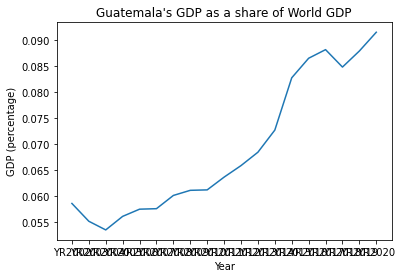

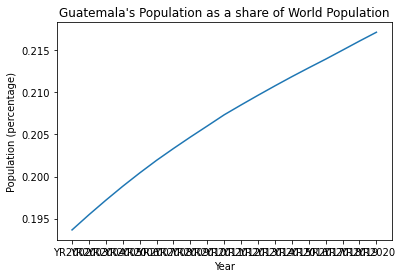

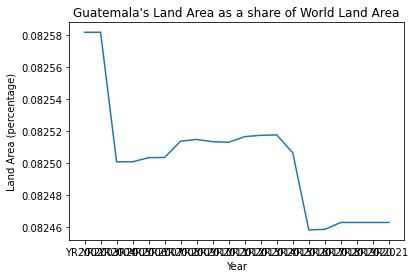

In [ ]:
# BLOCK 8
# Define graph input type
def graphTypeInput(question):
    while True:
        graphType = input(question)
        try:
            assert(graphType == "absolute" or graphType == "Absolute" or graphType == "ABSOLUTE" or graphType == "percentage" or graphType == "Percentage" or graphType == "PERCENTAGE")
            break
        except AssertionError:
            print("This is not a valid answer. Please type Absolute or Percentage.")
    return graphType

# Create dictionary for user input and corresponding variable code
vardictSWITCH2 = {
    "GDP": "NY.GDP.MKTP.CD",
    "POP": "SP.POP.TOTL",
    "LAND": "AG.LND.TOTL.K2",
}

# Create dictionary of readable labels
vardict2 = {
    "NY.GDP.MKTP.CD": "GDP",
    "SP.POP.TOTL": "Population",
    "AG.LND.TOTL.K2": "Land Area",
}

# Ask whether graph should be in absolute terms or percentage of world
graphType = graphTypeInput(f"Should the graphs be in absolute or percentage terms? (Absolute/Percentage): ")

graphVariableOptions = ["GDP", "POP","LAND"]

for graphVariable in graphVariableOptions:
    # Create plot given inputs
    if graphType == "Absolute" or graphType == "absolute" or graphType == "ABSOLUTE":
        row = df_graph.loc[vardictSWITCH2[graphVariable]]
        plt.plot(row)
        plt.xlabel("Year")
        plt.ylabel(vardict2[vardictSWITCH2[graphVariable]])
        plt.title(vardict2[vardictSWITCH2[graphVariable]] + " for " + CapitalizedCountryName)
        plt.show()
    else:
        row = (df_graph.loc[vardictSWITCH2[graphVariable]] / df_graph_world.loc[vardictSWITCH2[graphVariable]]) * 100
        plt.plot(row)
        plt.xlabel("Year")
        plt.ylabel(vardict2[vardictSWITCH2[graphVariable]] + " (percentage)")
        varname = vardict2[vardictSWITCH2[graphVariable]]
        plt.title(CapitalizedCountryName + "'s " + varname + " as a share of World " + varname)
        plt.show()


The following block of code returns the selected country's rank for GDP, population, and the selected additional variables. This is done using the merge and recursive sorting functions from class.

In [ ]:
# BLOCK 9: RANKS OUT OF ALL COUNTRIES AND TERRITORIES

countryCode = CountryCodeGLOBALVAR

# use merge function from class to sort this list with recursion
def merge(a, b):
    """Given two sorted lists of lists, return a single sorted list of lists"""
    
    # Check for and handle trivial merge cases
    if len(a) == 0:
        return b
    if len(b) == 0:
        return a

    # Create a place to put the merged lists
    merged = []
    # Calculate how long the merged list should be
    tot_length = len(a) + len(b)

    # Merge a and b
    while (len(merged) < tot_length):
        if len(a) == 0:
            merged.append(b.pop(0))
        elif len(b) == 0:
            merged.append(a.pop(0))
        elif a[0][1] < b[0][1]:
            merged.append(a.pop(0))
        else:
            merged.append(b.pop(0))

    return merged

def merge_sort(s):
    """Recursive merge sort"""
    # Catch trivial cases (i.e., lists that are sorted by definition)
    if len(s) < 2:
        return s
    
    # Find index at truncated midpoint of list
    mid = len(s) // 2

    # Return merge of the two sorted halves
    return merge(merge_sort(s[0:mid]), merge_sort(s[mid:]))

def mostRecentYear(variable, country):
    '''Takes a variable and a country and returns the year of the most recent data for that variable in that country.'''
    countryVardfTest = wb.data.DataFrame(variable, country, mrv=2)
    yearCol = list(countryVardfTest.columns)[1]
    year = int(yearCol[-4:])
    return year


i = 0
for var in WBVars:
    # get most recent year of data for the variable
    year = mostRecentYear(var, countryCode)

    # make dataframe with all countries for year with focus country's most recent data
    countryVardf = wb.data.DataFrame(var, time=year)
    # get rid of null value countries and regions for this variable
    countryVardf = countryVardf.dropna(subset=[var])

    # make country index a value in the dataframe
    countryVardf.reset_index(inplace=True)

    # get rid of non-countries/territories in list
    countrydict = wb.economy.coder(countryVardf["index"]);
    countryVardf["country"] = countrydict.values() 
    countryVardf = countryVardf.dropna(subset=["country"])
    countryVardf = countryVardf.drop("country", axis=1)
    
    # make df into a list of all countries paired with their variable value
    countryVarList = countryVardf.values.tolist()
    orderedCountries = merge_sort(countryVarList)

    # make a list of just the countries ordered highest to lowest
    orderedOnlyCountries = []
    for country in orderedCountries:
        orderedOnlyCountries.insert(0, country[0])
    
    # use .index() function to find the focus country's rank (adding 1 since the function returns an index)
    countryHighLowRank = orderedOnlyCountries.index(countryCode) + 1

    # get country name
    CapitalizedCountryName = countryGLOBALVAR.title()
    print(f"{CapitalizedCountryName}'s {WBNames[i]} ranking is {countryHighLowRank} out of 216 countries and territories in the world in {year}.")
    i +=1


Guatemala's GDP ranking is 69 out of 216 countries and territories in the world in 2020.
Guatemala's population ranking is 68 out of 216 countries and territories in the world in 2020.
Guatemala's refugee population ranking is 128 out of 216 countries and territories in the world in 2020.
Guatemala's infant mortality rate ranking is 75 out of 216 countries and territories in the world in 2020.


The following piece of code (Block 10) will find which countries and territories are within a user-inputted percentage of your chosen country in respect to the indicators you chose earlier. These countries and territories  are also sorted from closest in the indicator to your chosen country to furthest.\
Note that if there is no data for your chosen indicators for the year of 2020, the program will drop that indicator from the analysis (as there is not enough available data). Similarly, if your chosen percentage (e.g. 10%) does not yield any comparable countries, the program will raise the percentage for you by 1% until a comparable country is found.

In [ ]:
# BLOCK 10: finds comparable countries within alpha% of GDP, population, etc, in the year of 2020.  

# copy the varlists, because we'll be editing them
VARLIST = WBVars.copy()
VARLISTNAMES = WBNames.copy()

def checkForData2(variableList, country_code):
    """Checks for whether the country has data for the additional variables in 2020"""
    # create list
    noDataVar = []
    for var in variableList:
        countryVardfTest = wb.data.DataFrame(var, country_code, time=2020)
        if pd.isnull(countryVardfTest.at[country_code, var]):
            print(f"{codes[country_code]} doesn't have recent data for {VARLISTNAMES[VARLIST.index(var)]}.")
            print(f"We have dropped {VARLISTNAMES[VARLIST.index(var)]} from the analysis.")
            noDataVar.append(var)
            VARLISTNAMES.pop(VARLIST.index(var))
            VARLIST.remove(var)

checkForData2(VARLIST, CountryCodeGLOBALVAR)  # check data 
VARLISTNAMES.append("all chosen indicators") # append case of all indicators

# create and clean dataframe
countrydf = wb.data.DataFrame(VARLIST, time=2020) 
countrydf = countrydf[VARLIST]
countrydf.reset_index(inplace=True)
for i in VARLIST:
    countrydf = countrydf.dropna(subset=[i]) # cleaned dataset of nulls
countrydict = wb.economy.coder(countrydf["index"]); # match only to countries with ISO code
countrydf["clean"] = countrydict.values()  
countrydf = countrydf.dropna(subset=["clean"])

finalDF = countrydf.drop("clean", axis=1) # our final dataset 

DictData = finalDF.set_index('index').T.to_dict('list'); DictData # convert dataset to dictionary
lookup = CountryCodeGLOBALVAR # the chosen country UserInput

# Exact has the indicators' exact values stored for the chosen country
Exact = []
for i in range(len(VARLIST)):
    Exact.append(DictData[lookup][i])

VARLIST.append("ALL")
Match = {} # empty dictionary where we will store comparable countries
for i in range(len(VARLIST)):
    Match[VARLIST[i]] = [lookup]

# grab user input for desired percentage
def Percentage():
    while True:
        alpha = input("Within what percentage would you like to search? Acceptable input is a number between 0-100.)")
        try:
            alpha = int(alpha)
            assert(alpha > 0 and alpha <100)
            break
        except AssertionError:
            print("This is not a valid answer. Please type a value between 0 and 100.") 
        except ValueError:
            print("That is not a number. Please type a value between 0 and 100.")
    return(alpha) 

alpha = Percentage()
alpha = alpha/100

# while loop to add matches
ValCount = {k: [len(Match[k])] for k in Match.keys()}
tracker = 0 
for i in ValCount:
    tracker += sum(ValCount[i])
while tracker< (len(VARLIST)+1):
    for i in DictData.keys():
        if i not in Match["ALL"]:
            for j in range(len(Exact)):
                if int(DictData[i][j]) in range(int(Exact[j] - alpha*Exact[j]), int(Exact[j]+alpha*Exact[j])):
                    Match[VARLIST[j]].append(i)
            count = 0
            for j in range(len(Exact)):
                if i in Match[VARLIST[j]]:
                    count +=1
            if count == (len(Exact)):
                Match["ALL"].append(i)
    ValCount = {k: [len(Match[k])] for k in Match.keys()}; 
    tracker = 0 
    for i in ValCount:
        tracker += sum(ValCount[i])
    if tracker < (len(VARLIST)+2):
        print(f"We were unable to find any matches within {alpha*100}% of your statistic. We'll increase the percentage by an increment of 1 percent.")
        alpha += 0.01

# remove the first entry, which is just the chosen country
for i in VARLIST:
    Match[i].pop(0)

# sort and print output

# make a test dictionary of the distance between the indicators of comparable countries and chosen country
test = {}
for i in range(len(Match)):
    test[VARLIST[i]] = []

for i in range(len(VARLIST)-1):
    for j in range(len(Match[VARLIST[i]])):
        DiffDict = {}
        DiffDict["country"] = Match[VARLIST[i]][j]
        DiffDict["difference"] = abs(DictData[Match[VARLIST[i]][j]][i] - Exact[i])
        Match[VARLIST[i]][j]
        test[VARLIST[i]].append(DiffDict)
        pass

# sort the matches
for i in range(len(VARLIST)):
    test[VARLIST[i]] = sorted(test[VARLIST[i]], key=lambda d: d['difference'])

FinalOutput = {} # empty dictionary where we will store the sorted matches

for i in range(len(VARLIST)):
    FinalOutput[VARLIST[i]] = []

for i in range(len(VARLIST)-1):
    for j in range(len(Match[VARLIST[i]])):
        FinalOutput[VARLIST[i]].append(test[VARLIST[i]][j]['country'])

for i in range (len(Match["ALL"])):
    FinalOutput["ALL"].append(Match["ALL"][i]) 

for i in range(len(VARLIST)):
    for j in range(len(FinalOutput[VARLIST[i]])):
        FinalOutput[VARLIST[i]][j] = codes[FinalOutput[VARLIST[i]][j]]

print("RESULTS FOR 2020 (sorted from closest to furthest):")

for i in range(len(VARLISTNAMES)-1):
    print(f"{codes[lookup]}'s {VARLISTNAMES[i]} is {Exact[i]}.")
for i in range(len(VARLISTNAMES)):
    if len(Match[VARLIST[i]]) == 0:
        print(f"There are no countries and territories within {round(alpha*100)} percent of {codes[lookup]}'s {VARLISTNAMES[i]}.")
    else:
        print(f"The countries or territories that are within {round(alpha*100)} percent of {codes[lookup]}'s {VARLISTNAMES[i]} is {', '.join(FinalOutput[VARLIST[i]])}.")
print(f"Note that the list of countries or territories comparable on all chosen indicators is unsorted since there is no one indicator to sort by.")


RESULTS FOR 2020 (sorted from closest to furthest):
Guatemala's GDP is 77604632170.5853.
Guatemala's population is 16858333.0.
Guatemala's refugee population is 462.0.
Guatemala's infant mortality rate is 20.1.
The countries or territories that are within 23 percent of Guatemala's GDP is Dominican Republic, Sri Lanka, Oman, Luxembourg, Bulgaria, Ghana, Tanzania, United Republic of, Costa Rica, Côte d'Ivoire, Belarus, Uzbekistan.
The countries or territories that are within 23 percent of Guatemala's population is Senegal, Chad, Netherlands, Ecuador, Somalia, Zambia, Kazakhstan, Zimbabwe, Chile, Malawi, Romania, Mali, Guinea.
The countries or territories that are within 23 percent of Guatemala's refugee population is Kazakhstan, Gabon, Moldova, Republic of.
The countries or territories that are within 23 percent of Guatemala's infant mortality rate is Bolivia, Plurinational State of, Algeria, Indonesia, Philippines, Iraq, Azerbaijan, Fiji, Viet Nam, Egypt, Nepal, Guyana, Nauru, Paraguay,

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91a64189-2c46-45dd-ba11-1fb67be145b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>